In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.signal import iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt


Fs = 100
Ts = 1/Fs
d_emg1 = np.genfromtxt("./DIN_EMG_1.txt", delimiter="\t",skip_header = 3)
d_emg2 = np.genfromtxt("./DIN_EMG_2.txt", delimiter="\t",skip_header = 3)
emg1 = np.genfromtxt("./EMG_1.txt", delimiter="\t",skip_header = 3)
emg2 = np.genfromtxt("./EMG_2.txt", delimiter="\t",skip_header = 3)


In [2]:
wp=94
ws=157

# Parámetros del filtro
f0 = 40.0  # Frecuencia que queremos eliminar
Q = 30.0  # Calidad del filtro
fs = 100.0  # Frecuencia de muestreo

# Diseño del filtro
b, a = iirnotch(f0, Q, fs)



In [13]:
bits = 10 # Bits de la salida 
volt_range = 3.28 #Rango de voltaje en milivoltios (-1.64; 1.64) mV
# Extraer la penultima columna (datos)
s1 = np.vstack((d_emg1[: ,5], d_emg1[: ,11], d_emg1[: ,17]))
s2 = np.vstack((d_emg2[: ,5], d_emg2[: ,11], d_emg2[: ,17]))
s3 = np.vstack((emg1[: ,5], emg1[: ,11], emg1[: ,17]))
s4 = np.vstack((emg2[: ,5], emg2[: ,11], emg2[: ,17]))
d_y1 = (s1 * volt_range/(2**bits - 1))/30 # convertir los bits a mV
d_y2 = (s2 * volt_range/(2**bits - 1))/47 # convertir los bits a mV
y1 = (s3 * volt_range/(2**bits - 1))/30 # convertir los bits a mV
y2 = (s4 * volt_range/(2**bits - 1))/47 # convertir los bits a mV
"""
y = y - np.mean(y) # Centrar la señal, ya que va de -1.64 a 1.64
y = lfilter(b, a, y)
t = np.arange(0, len(y)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo
print(y)
plt.figure(figsize=(15, 15))
plt.plot(t, y, label="señal") # Señal completa
plt.title("Señal EMG capturada")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
plt.show()
"""

'\ny = y - np.mean(y) # Centrar la señal, ya que va de -1.64 a 1.64\ny = lfilter(b, a, y)\nt = np.arange(0, len(y)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo\nprint(y)\nplt.figure(figsize=(15, 15))\nplt.plot(t, y, label="señal") # Señal completa\nplt.title("Señal EMG capturada")\nplt.grid(linestyle=":")\nplt.xlabel("Tiempo (s)") \nplt.ylabel("Amplitud (mV)")\nfig = plt.gcf()\nfig.set_facecolor(\'white\')\nplt.savefig(\'complete_signal.png\', transparent=False, )\nplt.show()\n'

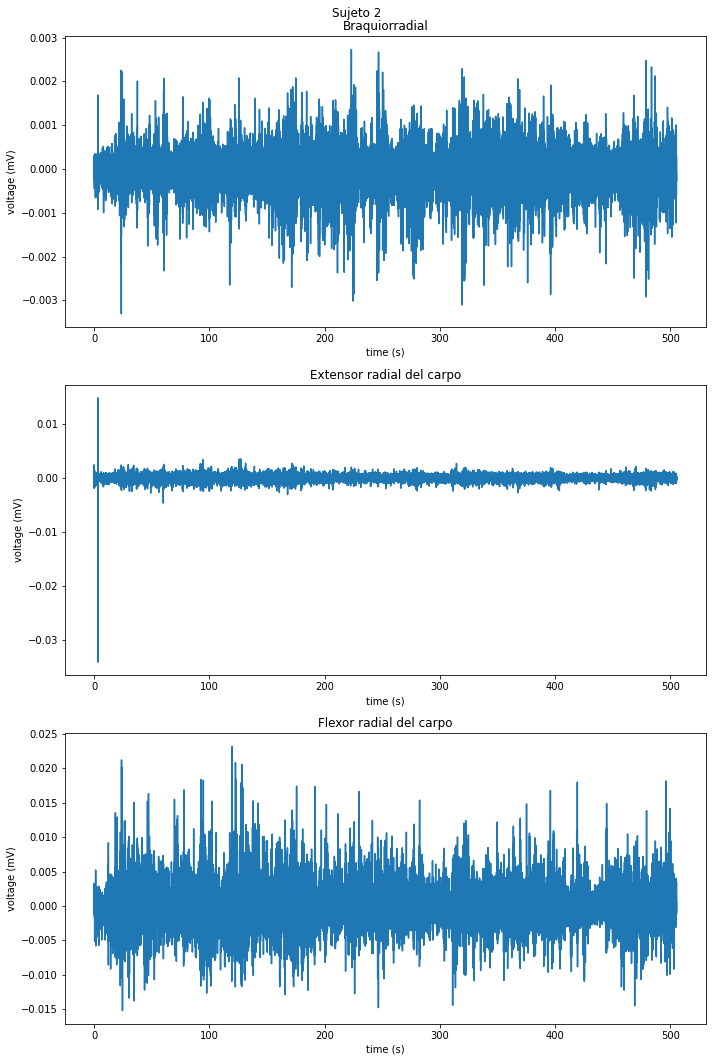

In [17]:
# Crear una figura y una matriz de subgráficas (3x1)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Asignar tus vectores de señales a una lista para simplificar el código
signals_list = [d_y1, d_y2, y1, y2]
signal_titles = ['Braquiorradial', 'Extensor radial del carpo', 'Flexor radial del carpo'] # Modifica esto a tu conveniencia
titles = ['Dinamómetro: Sujeto 1', 'Dinamómetro: Sujeto 2', 'Sujeto 1', 'Sujeto 2']
selected_group = 3  # Selecciona el grupo que deseas graficar (0 a 3)

# Asume que ya tienes tus coeficientes de filtro b, a definidos en algún lugar de tu código

# Para el conjunto de señales seleccionado, filtra y centra cada una, luego dibuja las señales en su respectiva subgráfica
signals = signals_list[selected_group]
for j in range(3):
    # Centrar y filtrar
    signals[j, :] = signals[j, :] - np.mean(signals[j, :])  # Centrar la señal
    signals[j, :] = lfilter(b, a, signals[j, :])  # Filtrar la señal

    # Crear vector de tiempo considerando periodo de muestreo
    Ts = 0.01  # Asegúrate de definir tu valor correcto de Ts (periodo de muestreo)
    t = np.arange(0, len(signals[j, :]) * Ts, Ts)  # Crear vector de tiempo

    # Dibujar la señal
    axs[j].plot(t, signals[j, :], label=signal_titles[j])
    
    # Añade títulos a las subgráficas para identificarlas
    axs[j].set_title(f'{signal_titles[j]}')


    # Añade etiquetas a los ejes X e Y
    axs[j].set(xlabel='time (s)', ylabel='voltage (mV)')

# Ajustar los espacios entre las subgráficas para evitar que se solapen
plt.suptitle(titles[selected_group])
plt.tight_layout()
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
plt.show()

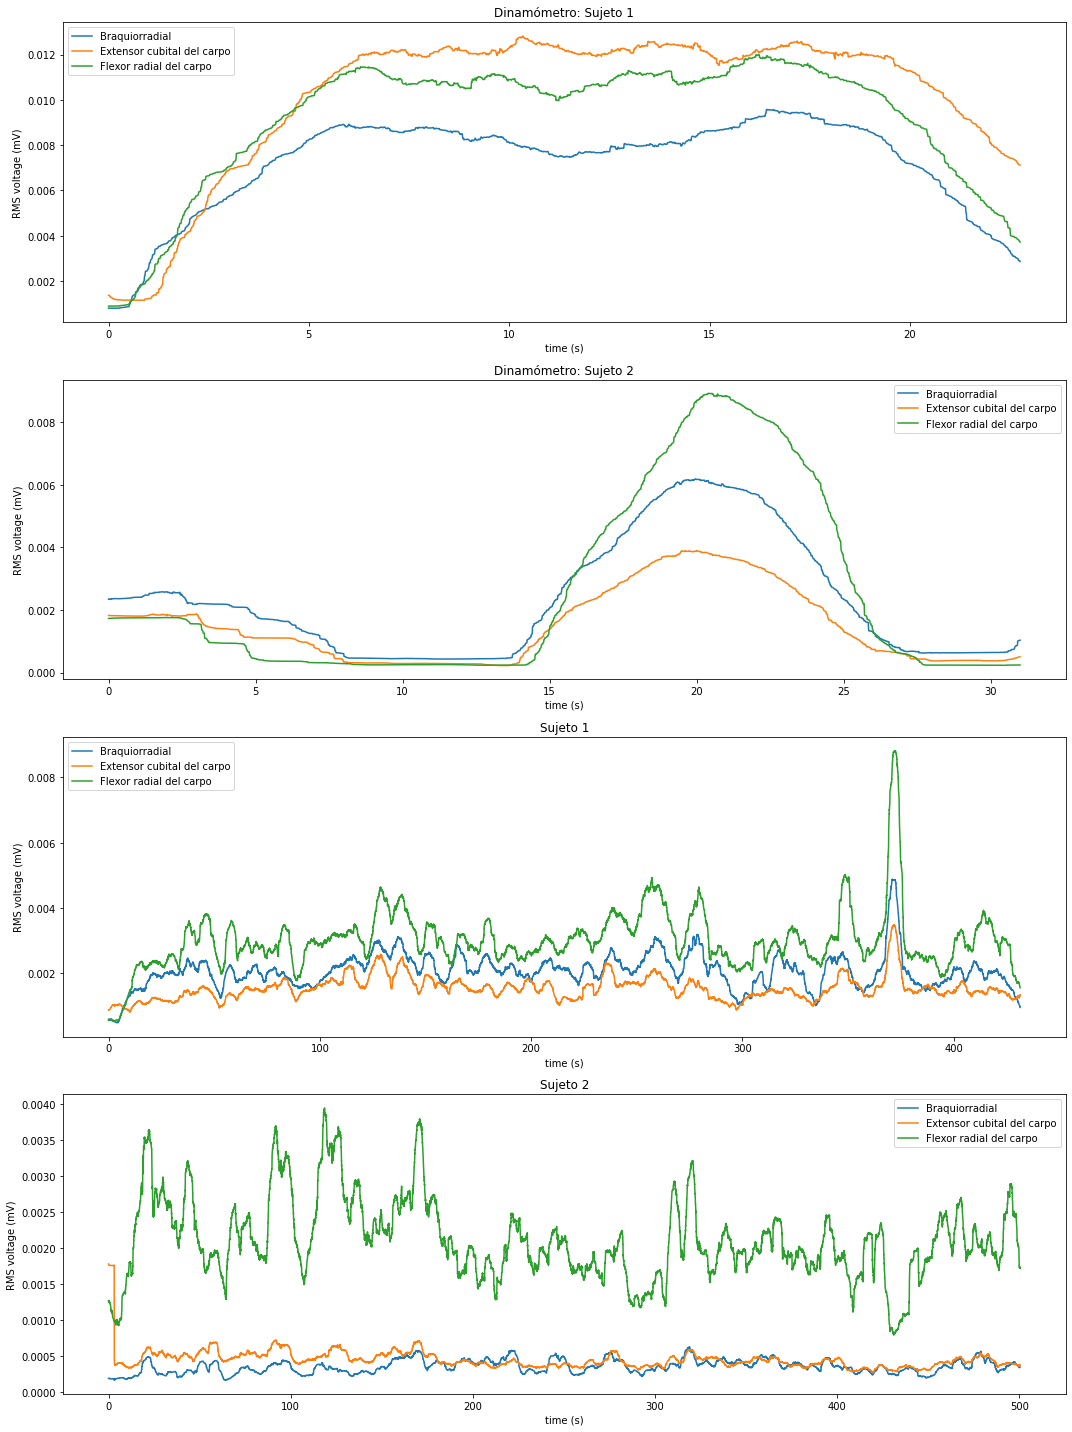

In [18]:
def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))

window_size = 500  # Ajusta este valor al tamaño de tu ventana

# Crear una figura y 4 subgráficas (una por cada conjunto de señales)
fig, axs = plt.subplots(4, figsize=(15, 20))

# Asignar tus vectores de señales a una lista para simplificar el código
signals_list = [d_y1, d_y2, y1, y2]
titles = ['Dinamómetro: Sujeto 1', 'Dinamómetro: Sujeto 2', 'Sujeto 1', 'Sujeto 2']
legend_labels = ['Braquiorradial', 'Extensor cubital del carpo', 'Flexor radial del carpo']
for i, signals in enumerate(signals_list):
    for j in range(3):
        # Calcular RMS
        rms_signal = window_rms(signals[j, :], window_size)

        # Crear vector de tiempo considerando periodo de muestreo
        # Considera que el tamaño del RMS será menor que el de la señal original debido al tamaño de la ventana
        Ts = 0.01  # Asegúrate de definir tu valor correcto de Ts (periodo de muestreo)
        t = np.arange(0, len(rms_signal) * Ts, Ts)  # Crear vector de tiempo

        # Dibujar la señal RMS y agregar una etiqueta a la línea para la leyenda
        axs[i].plot(t, rms_signal, label=legend_labels[j])

    # Añade títulos a las subgráficas para identificarlas
    axs[i].set_title(titles[i])

    # Añade la leyenda a la subgráfica
    axs[i].legend()

# Añade etiquetas a los ejes X e Y
for ax in axs:
    ax.set(xlabel='time (s)', ylabel='RMS voltage (mV)')

# Ajustar los espacios entre las subgráficas para evitar que se solapen
fig.set_facecolor('white')

plt.tight_layout()
plt.savefig('complete_signal.png', transparent=False, )
plt.show()


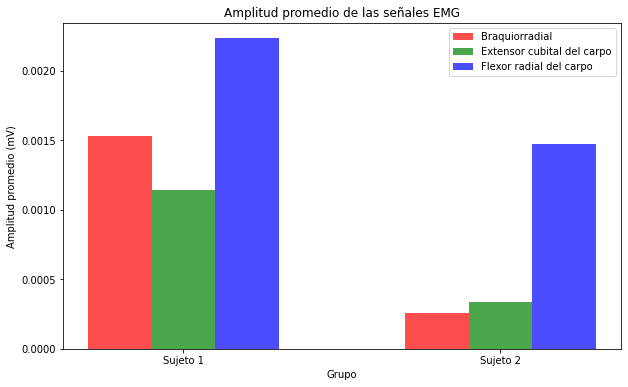

In [19]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Asignar tus vectores de señales a una lista para simplificar el código
signals_list = [y1, y2]
group_labels = ['Sujeto 1', 'Sujeto 2']
signal_labels = ['Braquiorradial', 'Extensor cubital del carpo', 'Flexor radial del carpo']
colors = ['red', 'green', 'blue']  # Define colores para las barras

# Calcula las amplitudes promedio para cada conjunto de señales
avg_amplitudes = []
for i, signals in enumerate(signals_list):
    subject_amps = []
    for j in range(3):
        amplitude = np.mean(np.abs(signals[j, :]))   # Calcula la amplitud
        subject_amps.append(amplitude)
    avg_amplitudes.append(subject_amps)

# Dibuja las barras superpuestas para cada grupo de amplitudes
bar_width = 0.2
x = np.arange(len(group_labels))  # Las localizaciones de las etiquetas en el eje x

for i in range(3):
    ax.bar(x + i*bar_width, [avg_amp[i] for avg_amp in avg_amplitudes], width=bar_width, color=colors[i], alpha=0.7, label=signal_labels[i])

# Ajusta las etiquetas del eje x para que aparezcan en el centro de los grupos de barras
ax.set_xticks(x + bar_width)
ax.set_xticklabels(group_labels)

# Añade la leyenda, títulos y etiquetas a los ejes
ax.legend()
ax.set_title('Amplitud promedio de las señales EMG')
ax.set_xlabel('Grupo')
ax.set_ylabel('Amplitud promedio (mV)')
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
# Muestra el gráfico
plt.show()


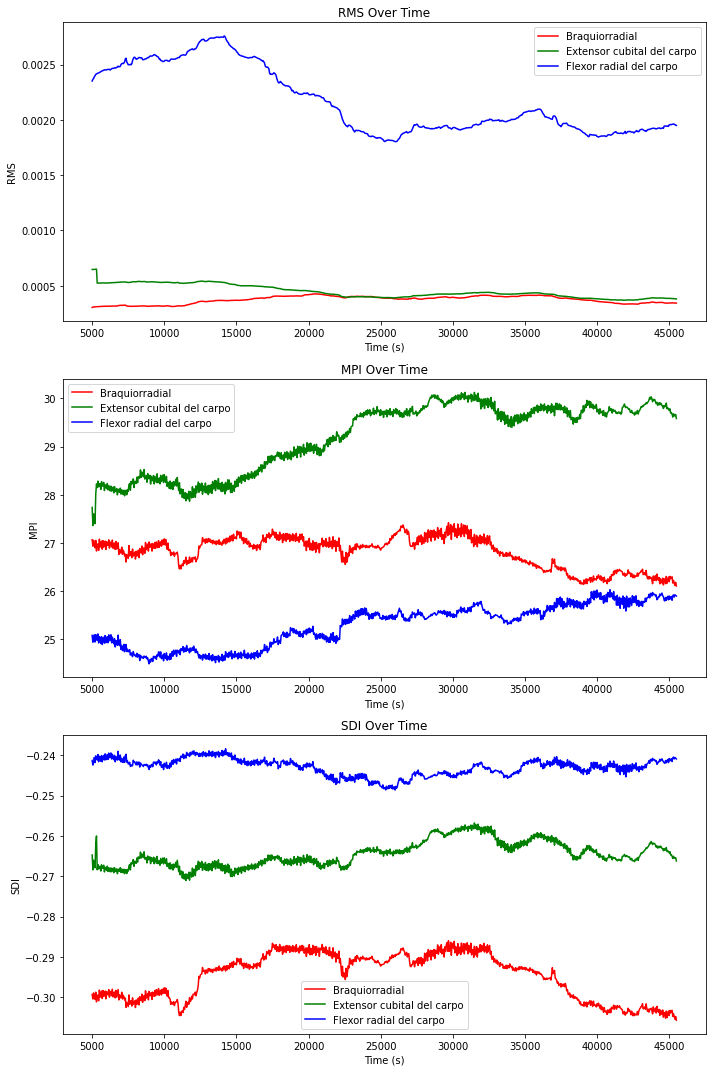

In [20]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def compute_sdi(rms, freq_mean):
    return np.log(rms) / freq_mean

# Definir parámetros
window_size = 10000  # Tamaño de la ventana en muestras
stride = 50  # Paso en muestras
Ts = 0.01  # Periodo de muestreo
freq_res = 1 / (window_size * Ts)  # Resolución de la frecuencia

# Colores y leyendas para las gráficas
colors = ['r', 'g', 'b']
labels = ['Braquiorradial', 'Extensor cubital del carpo', 'Flexor radial del carpo']

# Crear una figura y 3 subgráficas
fig, axs = plt.subplots(3, figsize=(10, 15))

for i in range(3):
    # Listas para guardar los valores de RMS, MPI y SDI
    rms_values = []
    mpi_values = []
    sdi_values = []

    # Recorre la señal con una ventana deslizante
    for j in range(0, len(y2[i]) - window_size, stride):
        # Extraer la ventana de la señal
        window = y2[i][j:j+window_size]
        
        # Calcular y guardar RMS
        rms = np.sqrt(np.mean(np.square(window)))
        rms_values.append(rms)
        
        # Calcular y guardar MPI
        freqs, psd = welch(window, fs=1.0/Ts)
        freq_mean = np.sum(freqs * psd) / np.sum(psd)
        mpi_values.append(freq_mean)
        
        # Calcular y guardar SDI
        sdi = compute_sdi(rms, freq_mean)
        sdi_values.append(sdi)

    # Crear vector de tiempo para el eje x de las gráficas
    t = np.arange(window_size / 2, len(y2[i]) - window_size / 2, stride)

    # Graficar RMS, MPI y SDI
    axs[0].plot(t, rms_values, color=colors[i], label=labels[i])
    axs[0].set_title('RMS Over Time')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('RMS')

    axs[1].plot(t, mpi_values, color=colors[i], label=labels[i])
    axs[1].set_title('MPI Over Time')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('MPI')

    axs[2].plot(t, sdi_values, color=colors[i], label=labels[i])
    axs[2].set_title('SDI Over Time')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('SDI')

# Añadir las leyendas
for ax in axs:
    ax.legend()

# Ajustar los espacios entre las subgráficas para evitar que se solapen
plt.tight_layout()
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
plt.show()


Porcentaje de actividad muscular para la señal de Braquiorradial:
    y1: 31.03%
    y2: 12.88%
Porcentaje de actividad muscular para la señal de Extensor cubital del carpo:
    y1: 16.11%
    y2: 26.55%
Porcentaje de actividad muscular para la señal de Flexor radial del carpo:
    y1: 35.96%
    y2: 60.37%


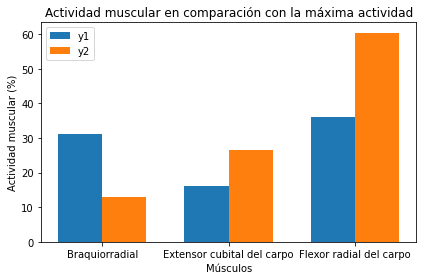

In [21]:
def calculate_rms(signal):
    return np.sqrt(np.mean(np.square(signal)))
    
muscle_labels = ['Braquiorradial', 'Extensor cubital del carpo', 'Flexor radial del carpo']
# Calcular la actividad muscular máxima (RMS) para cada señal en d_y1 y d_y2
max_activity_d_y1 = [calculate_rms(signal) for signal in d_y1]
max_activity_d_y2 = [calculate_rms(signal) for signal in d_y2]

# Calcular la actividad muscular (RMS) para cada señal en y1 y y2
activity_y1 = [calculate_rms(signal) for signal in y1]
activity_y2 = [calculate_rms(signal) for signal in y2]

# Calcular el porcentaje de actividad para y1 y y2 en comparación con la máxima actividad
percentage_y1 = [(activity / max_activity) * 100 for activity, max_activity in zip(activity_y1, max_activity_d_y1)]
percentage_y2 = [(activity / max_activity) * 100 for activity, max_activity in zip(activity_y2, max_activity_d_y2)]

# Imprimir los porcentajes de actividad
for i, (perc_y1, perc_y2) in enumerate(zip(percentage_y1, percentage_y2)):
    print(f"Porcentaje de actividad muscular para la señal de {labels[i]}:")
    print(f"    y1: {perc_y1:.2f}%")
    print(f"    y2: {perc_y2:.2f}%")
# Configurar las ubicaciones de las barras en el eje x
bar_locations = np.arange(len(muscle_labels))

# Ancho de las barras
bar_width = 0.35

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Dibujar las barras para y1
bar_y1 = ax.bar(bar_locations - bar_width / 2, percentage_y1, width=bar_width, label='y1')

# Dibujar las barras para y2
bar_y2 = ax.bar(bar_locations + bar_width / 2, percentage_y2, width=bar_width, label='y2')

# Añadir etiquetas, título y leyenda al gráfico
ax.set_xlabel('Músculos')
ax.set_ylabel('Actividad muscular (%)')
ax.set_title('Actividad muscular en comparación con la máxima actividad')
ax.set_xticks(bar_locations)
ax.set_xticklabels(muscle_labels)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
plt.show()